In [21]:
import pandas as pd
import numpy as np

# Section One

In [22]:
df = pd.read_csv("./advertising.csv")

In [23]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [25]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Section two

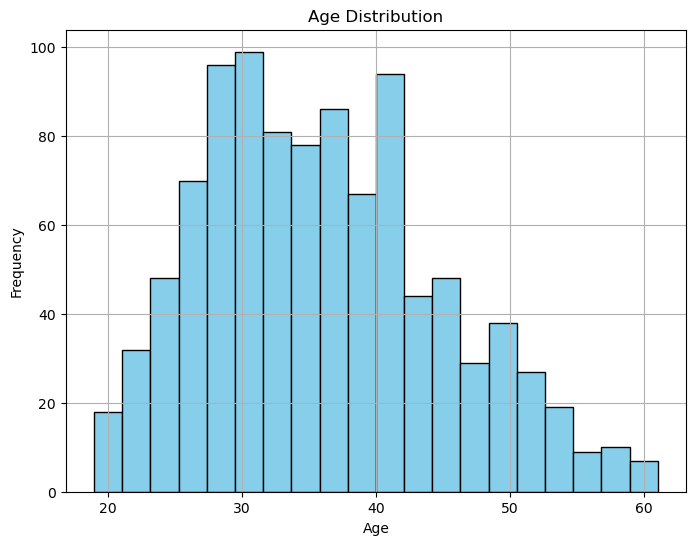

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

age_data = df['Age']

plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Section three

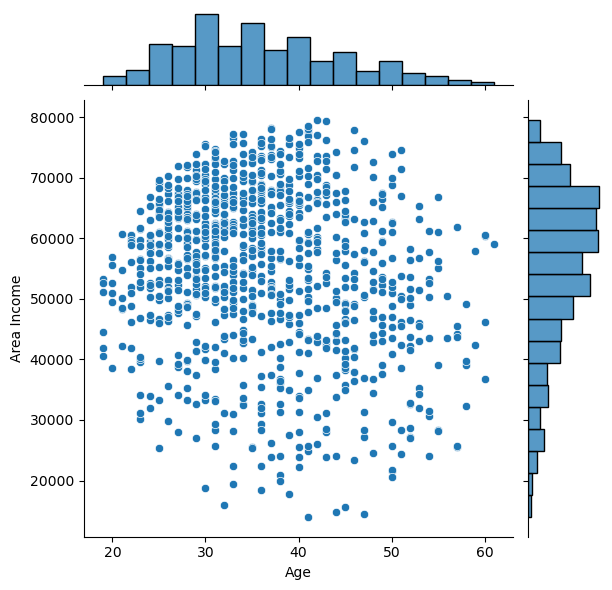

In [27]:
import seaborn as sns

sns.jointplot(x='Age', y='Area Income', data=df, kind='scatter')
plt.show()

# Section Four

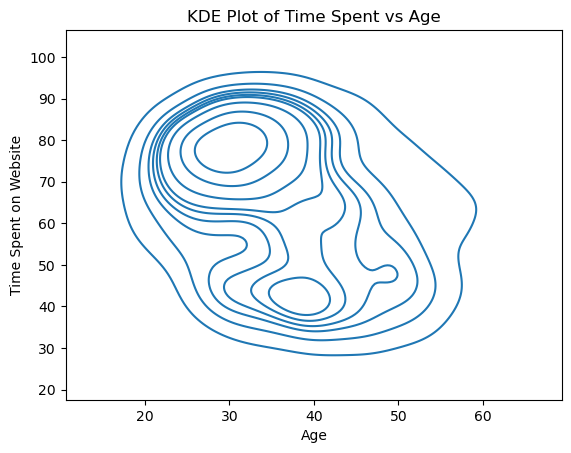

In [28]:
sns.kdeplot(x='Age', y='Daily Time Spent on Site', data=df)
plt.title('KDE Plot of Time Spent vs Age')
plt.xlabel('Age')
plt.ylabel('Time Spent on Website')
plt.show()

# Section Five

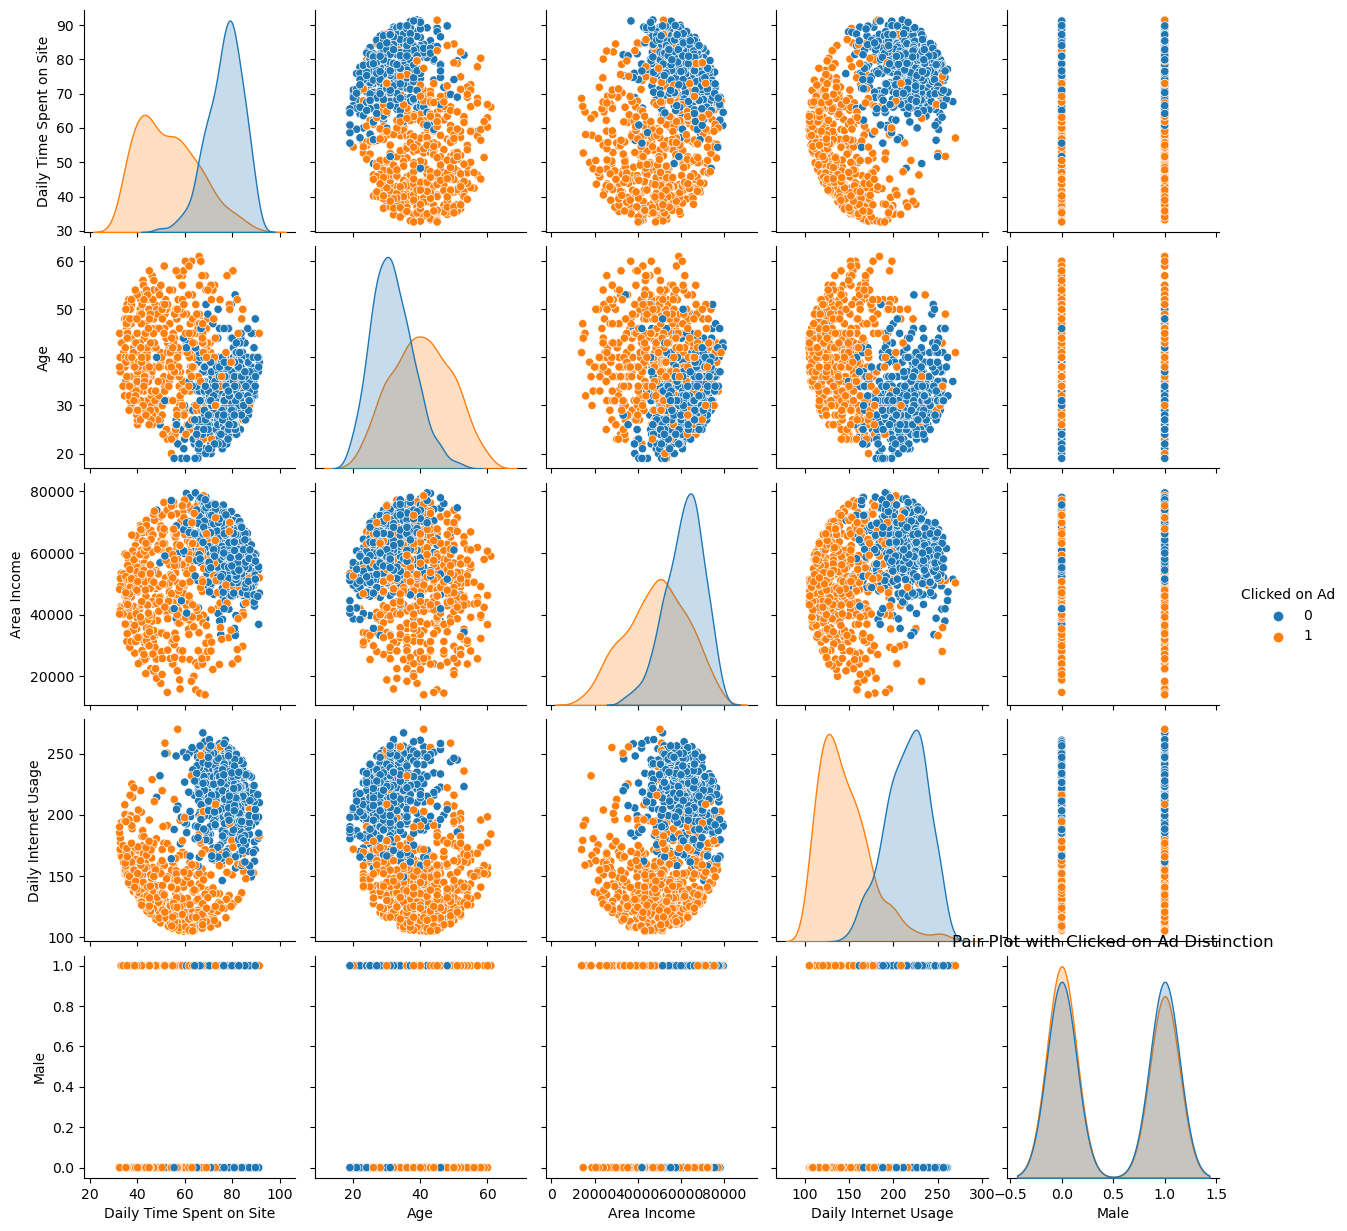

In [29]:
sns.pairplot(df, hue='Clicked on Ad')
plt.title('Pair Plot with Clicked on Ad Distinction')
plt.show()

# Section seven

In [31]:
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split


X = df.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Timestamp','Country'], axis=1)
y = df['Clicked on Ad']

numeric_columns = ['Daily Time Spent on Site','Age' ,'Area Income', 'Daily Internet Usage']  # Add other numeric columns
scaler = MinMaxScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
541,0.731770,0.476190,0.763878,0.866449,1
440,0.228455,0.309524,0.786452,0.261170,0
482,0.625871,0.142857,0.790900,0.657465,0
422,0.353221,0.380952,0.714736,0.092505,1
778,0.341152,0.595238,0.011895,0.523550,0
...,...,...,...,...,...
106,0.673636,0.142857,0.497210,0.824858,1
270,0.202108,0.809524,0.749808,0.382734,1
860,0.998980,0.619048,0.579096,0.471425,1
435,0.408975,0.547619,0.896159,0.209711,0


# Section Eitght & Nine

In [33]:
import numpy as np

class LogisticRegression:
    def __init__(self, X_train, y_train, learning_rate=0.01, num_iter=100000):
        self.X = X_train
        self.y = y_train
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.theta = None
        self.cost_list = []

    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def calc_h(self, X, theta):
        z = np.dot(X, theta)
        return self.sigmoid(z)

    def train(self):
        XX = self.add_intercept(self.X)
        self.theta = np.zeros(XX.shape[1])

        m = self.y.size

        for i in range(self.num_iter):
            h = self.calc_h(XX, self.theta)
            cost = (-self.y * np.log(h) - (1 - self.y) * np.log(1 - h)).mean()
            self.cost_list.append(cost)

            gradient = np.dot(XX.T, (h - self.y)) / m
            self.theta -= self.learning_rate * gradient

            if i % 10000 == 0:
                print('Cost: {}'.format(cost))

        print('Adjusted coefficient: {}'.format(self.theta))

    def predict(self, X_test):
        XX_test = self.add_intercept(X_test)
        h = self.calc_h(XX_test, self.theta)
        return [1 if val >= 0.5 else 0 for val in h]


#
log_reg = LogisticRegression(X_train, y_train)
log_reg.train()


Cost: 0.693147180559947
Cost: 0.20919699705516445
Cost: 0.15646058216017925
Cost: 0.1357958889413689
Cost: 0.12436503557753759
Cost: 0.11693325533282888
Cost: 0.11163025560878394
Cost: 0.1076127258086123
Cost: 0.10444042894881415
Cost: 0.1018589684480845
Adjusted coefficient: [ 8.13846559 -6.31189505  4.99437709 -3.74738982 -7.91933846 -0.21088864]


In [34]:
predictions = log_reg.predict(X_test)


# Section Ten

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


Accuracy: 0.95
Confusion Matrix:
[[142   4]
 [ 10 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       146
           1       0.97      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



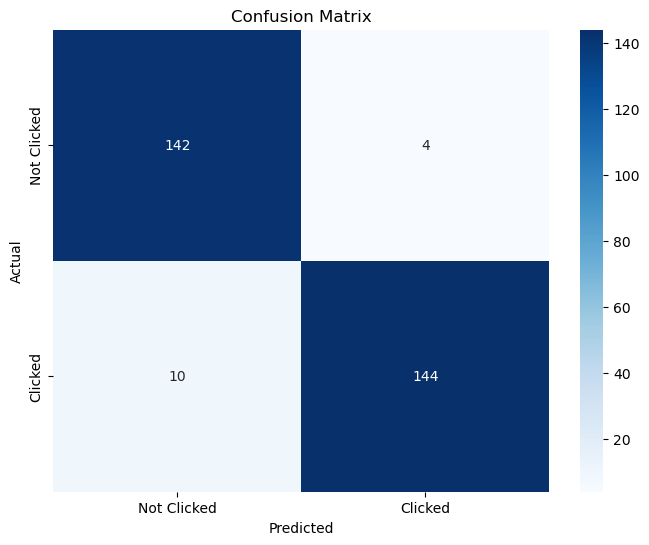

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Clicked', 'Clicked'], 
            yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()